<h1><center> Stroke Analysis </center> </h1>

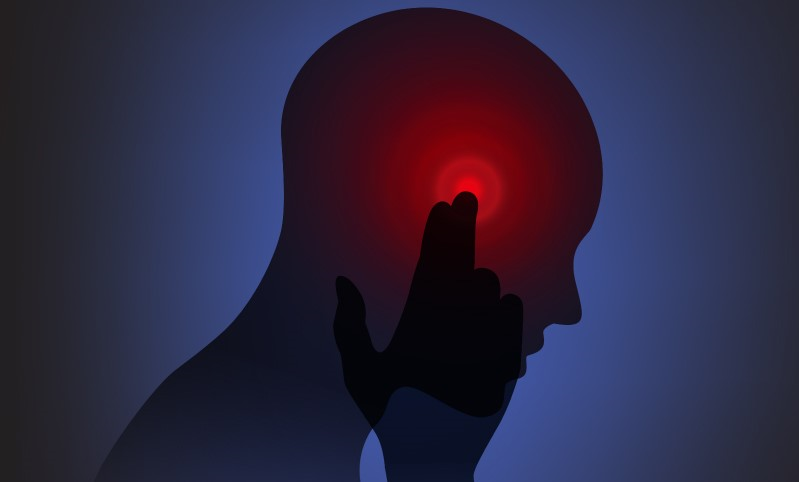

A <b>Brain Stroke</b> is a condition when the supply of blood to a portion of the brain is interrupted. This prevents the brain tissues from getting oxygen and nutrients. The brain cells thus begin to die. It is critical and needs to be given immediate treatment. Brain stroke causes several symptoms such as trouble walking, speaking, and understanding, as well as paralysis or numbness of the face, arm, or leg. According to the <b>World Health Organization (W.H.O)</b>, about 15 million people suffer stroke worldwide yearly. Out of these 15 million, about 5 million die, and 5 million are permanently paralyzed. High blood pressure is our mortal enemy who is contributing to more than 12.7 million strokes worldwide. 

This notebook aims at building a predictive model that helps in identifying whether a patient is likely to suffer from a brain stroke.

Kindly provide an upvote if this notebook was useful. Also, I would greatly appreciate any feedback or suggestions for improvement.

Thank-you :)

# Data Cleaning and Processing

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, precision_score, recall_score, roc_auc_score  
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from random import randint
import seaborn as sns
import pandas as pd
import numpy as np


In [ ]:
Data = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

In [ ]:
print("Dataframe Details")
print("Total Rows: {}\nTotal Columns: {}".format(Data.shape[0],Data.shape[1]))

Data.head()

In [ ]:
Data.isnull().sum().sort_values(ascending=False)[:5]

In [ ]:
bmi = round(Data['bmi'].mean(),1) 
Data['bmi'].fillna(bmi, inplace=True)

In [ ]:
Data['age'].fillna(0,inplace=True)
bins = [0,18,36,54,72,90]
labels = ['0-18','18-36','36-54','54-72','72-90']
Data['age'] = pd.cut(Data['age'], bins=bins, labels=labels)
Data.head()

Below is the list of a variety of color palette that can be used while creating visuals

In [ ]:
colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap',
          'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
          'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
          'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
          'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 
          'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 
          'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 
          'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
          'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 
          'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 
          'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 
          'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 
          'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 
          'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 
          'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 
          'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 
          'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

# Data Visualization

In [ ]:
StrokeAnalysis = Data.copy()
StrokeAnalysis['hypertension'] = StrokeAnalysis['hypertension'].apply(lambda x : 'Hypertension' if x == 1 else 'No Hypertension') 
StrokeAnalysis['heart_disease'] = StrokeAnalysis['heart_disease'].apply(lambda x : 'Heart Disease' if x == 1 else 'No Heart Disease') 
StrokeAnalysis['stroke'] = StrokeAnalysis['stroke'].apply(lambda x : 'Suffered Stroke' if x == 1 else 'Never Suffered Stroke') 
StrokeAnalysis['ever_married'] = StrokeAnalysis['ever_married'].apply(lambda x : 'Married' if x == 'Yes' else 'Unmarried') 

StrokeAnalysis.head()

In [ ]:
value = randint(0, len(colors)-1)

sns.countplot(x = 'stroke',palette = colors[value],data = StrokeAnalysis)

plt.xlabel("Patient Type")
plt.ylabel("Count Of Patients")

The number of patients who have suffered a stroke is very less as compared to the data with the ones who haven't suffered.

In [ ]:
value = randint(0, len(colors)-1)

sns.countplot(x = 'stroke',hue = 'gender',palette = colors[value],data = StrokeAnalysis)

plt.xlabel("Patient Type & Gender")
plt.ylabel("Count Of Patients")

There is a majority of female patients.

In [ ]:
value = randint(0, len(colors)-1)

sns.countplot(x = StrokeAnalysis[StrokeAnalysis['smoking_status'] != 'Unknown']['smoking_status'], hue = 'gender',
            palette = colors[value],data = StrokeAnalysis)

plt.xlabel("Smoking Status")
plt.ylabel("Count by Gender")


A large portion of patients have never smoked in their lifetime, majority being women.

In [ ]:
plt.figure(figsize=(10,5))
placement = 1

for i in ['hypertension','heart_disease']:
    label = []
    value = []
    for j in range(len(StrokeAnalysis[i].value_counts().index)):
        label.append(StrokeAnalysis[i].value_counts().index[j])
        value.append(StrokeAnalysis[i].value_counts()[j])
        
    plt.subplot(1,2,placement)    
    explode = (0.1, 0.2)
    plt.pie(value, labels = label,autopct='%1.2f%%',colors=['brown','darksalmon'],shadow=True,explode=explode)
    plt.title("{} VS {}".format(label[0],label[1]))
    placement += 1
    
plt.tight_layout(pad=0.4)    

The propotion of patients with hypertension and heart diseases are very low.

In [ ]:
value = randint(0, len(colors)-1)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)  
sns.countplot(x = 'age', hue = 'hypertension',
            palette = colors[value],data = StrokeAnalysis)

plt.xlabel("Hypertension")
plt.ylabel("Count by age")

plt.subplot(1,2,2)  
sns.countplot(x = 'age', hue = 'heart_disease',
            palette = colors[value],data = StrokeAnalysis)

plt.xlabel("Heart Disease")
plt.ylabel("Count by age")

plt.tight_layout(pad=0.4)    

We observe that patients between the age of 0-18 do not suffer from hypertension or any underlying heart conditions whereas patients above 18 years of age may be suffering from either hypertension, heart conditions, or both. 

In [ ]:
value = randint(0, len(colors)-1)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)  
sns.countplot(x = 'work_type', hue = 'hypertension',
            palette = colors[value],data = StrokeAnalysis)

plt.xlabel("Hypertension")
plt.ylabel("Count by age")

plt.subplot(1,2,2)  
sns.countplot(x = 'work_type', hue = 'heart_disease',
            palette = colors[value],data = StrokeAnalysis)

plt.xlabel("Heart Disease")
plt.ylabel("Count by age")

plt.tight_layout(pad=0.4)    

Children and patients who have never worked are likely not to suffer from any underlying conditions.

In [ ]:
plt.figure(figsize=(10,6))
placement = 1

for i in ['ever_married','Residence_type']:
    label = []
    value = []
    for j in range(len(StrokeAnalysis[i].value_counts().index)):
        label.append(StrokeAnalysis[i].value_counts().index[j])
        value.append(StrokeAnalysis[i].value_counts()[j])
        
    plt.subplot(2,2,placement)    
    explode = (0.1, 0.1)
    plt.pie(value, labels = label,autopct='%1.2f%%',colors=['darkslategrey','paleturquoise'],shadow=True,explode=explode)
    plt.title("{} VS {}".format(label[0],label[1]))
    placement += 1
    
plt.tight_layout(pad=0.4)    

We see that the number of patients married are much more. The proportion of rural and urban patients are almost equal.

In [ ]:
value = randint(0, len(colors)-1)

sns.countplot(x = 'Residence_type', hue = 'ever_married', palette = colors[value],data = StrokeAnalysis)
plt.legend(StrokeAnalysis['ever_married'].unique(), loc ="upper right") 
plt.xlabel("Residence Type")
plt.ylabel("Count by Marital Status")

There is no difference in the marriage rate between rural and urban areas.

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1) 
label = StrokeAnalysis['age'].value_counts().index
value = StrokeAnalysis['age'].value_counts().values
explode = (0.2,0,0,0,0.2)
plt.pie(value, labels = label,autopct='%1.2f%%',colors=['deepskyblue','steelblue','lightslategrey','skyblue','crimson'],shadow=True,explode=explode)
plt.title("Age Bifurcation")

plt.subplot(1,2,2)  
label = StrokeAnalysis['work_type'].value_counts().index
value = StrokeAnalysis['work_type'].value_counts().values
explode = (0.1,0,0,0,1)
plt.pie(value, labels = label,autopct='%1.2f%%',colors=['deepskyblue','steelblue','lightslategrey','skyblue','crimson'],shadow=True,explode=explode)
plt.title("Work Type Bifurcation")

plt.tight_layout(pad=0.4)    

The majority of our patients belong to the age category of 36-54 and most of them work in private sectors.

In [ ]:
value = randint(0, len(colors)-1)

sns.boxplot(x = 'work_type', y = 'avg_glucose_level', hue = 'Residence_type',palette = colors[value],data = StrokeAnalysis)
plt.xlabel("Residence & Work Type")
plt.ylabel("Count by Body Mass Index")

Due to the number of outliers, it becomes very to analyze the data, thus it is necessary to handle these outliers.

In [ ]:
value = randint(0, len(colors)-1)

StrokeAnalysis = StrokeAnalysis[StrokeAnalysis['bmi']<50]
sns.lmplot(x = 'bmi', y = 'avg_glucose_level',palette = colors[value],data = StrokeAnalysis)
plt.xlabel("Body Mass Index")
plt.ylabel("Average Glucose Level")

There is no deterministic relationship between Body Mass Index and Average Glucose Level. We have temporarily dealt with the outliers to identify a relationship between them. It is always advisable to deal with these outliers before we train a prediction model.

# Summary of Analysis

- Data for patients suffering from a stroke are much lesser than those who have not suffered a stroke. This imbalance would cause our model to make a wrongful prediction, therefore we will balance our data before data modeling
- A major portion of the patients are women and it is observed that these patients have not suffered any stroke in the past.
- As compared to males many female patients do not smoke. The probable reason being that the data captured have a majority of female records  
- It is observed that patients who formerly smoked are little higher than those who currently continue smoking
- As per the data patients suffering from hypertension and heart diseases are only 9.75% and 5.40% respectively
- Patients between the age of 0-18 do not suffer from any conditions, specifically hypertension and heart diseases
- As a patient grows older it is observed that hypertension due to work-related stress may increase, also creating room for heart diseases
- We see that the patients working for private sectors are exposed to higher stress levels than the rest of the working class
- Children and patients who have never worked may not be suffering from any
  underlying conditions.
- There is a very minor difference in the proportion of patients living in urban/rural areas. Whereas a majority of patients have been married (Current marital status unknown)
- The majority of our patients below to a private working class and are between the ages of 36-54. 
- A very less portion of our patients has never worked. Also, a very less portion of our patients are senior citizens.
- We observe that there are many outliers in the body mass index and the average glucose level, which needs to be handled before data modeling


# Data Modeling

In [ ]:
value = randint(0, len(colors)-1)
plt.figure(figsize=(15,5))

plt.subplot(2,2,1)
plt.title("Average Glucose Level with Outliers")
sns.boxplot(x = Data['avg_glucose_level'],palette = colors[value])
plt.xlabel("Glucose Level")

plt.subplot(2,2,2)
plt.title("Body Mass Index with Outliers")
sns.boxplot(x = Data['bmi'],palette = colors[value])
plt.xlabel("Body Mass Index")

plt.subplot(2,2,3)
plt.title("Average Glucose Level without Outliers")
Data = Data[Data['avg_glucose_level'] < 130] 
sns.boxplot(x = Data['avg_glucose_level'],palette = colors[value])
plt.xlabel("Glucose Level")

plt.subplot(2,2,4)
plt.title("Body Mass Index without Outliers")
Data = Data[(Data['bmi'] > 10.3) & (Data['bmi'] < 43)] 
sns.boxplot(x = Data['bmi'],palette = colors[value])
plt.xlabel("Body Mass Index")

plt.tight_layout(pad=0.6)

Having outliers in the dataset guides the algorithm onto making wrong predictions, that seem just right to the predictive model. Therefore we have eliminated the outliers using a graphical method.

In [ ]:
encoder = LabelEncoder()

column = ['gender', 'age', 'hypertension', 'ever_married','work_type', 'Residence_type', 'smoking_status']

for i in column:
    Data[i] = encoder.fit_transform(Data[i])
    
Data.head()

In [ ]:
majority = Data[Data['stroke'] == 0]
minority = Data[Data['stroke'] == 1]

upsampled = resample(minority, replace=True, n_samples=len(majority))

As we had noted in our analysis our dataset is high imbalanced. Therefore we use the method of resample() to duplicate the records of the class - Suffered from a stroke. We duplicate these class records such that they match up to the number of records of class - Not suffered from a stroke. 

In [ ]:
StrokeData = pd.concat([majority,upsampled])
StrokeData = StrokeData.sample(frac=1).reset_index(drop=True)
StrokeData.head()

It is necessary to shuffle our data such that the algorithms can learn different records as it is served as an input. Once the dataset is shuffled we are good to go.

In [ ]:
X = StrokeData.drop(['id','stroke'],axis=1)
y = StrokeData['stroke']

DataModels = pd.DataFrame()

In [ ]:
def TrainandTestwithMinMaxScalar(X,y,algorithm,modelname):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    norm = MinMaxScaler().fit(X_train)

    X_train = norm.transform(X_train)

    X_test = norm.transform(X_test)

    model = algorithm
    model.fit(X_train, y_train)

    prediction = model.predict(X_test)

    score = round((accuracy_score(y_test, prediction)*100),2)
    print("\nModel Score:",score,"%")
    print("Precision:", precision_score(y_test, prediction))
    print("Recall:", recall_score(y_test, prediction))
    print("F1 score:", f1_score(y_test, prediction))
    print("ROC-AUC score:", roc_auc_score(y_test, prediction))
    print("Confusion Matrix:\n", confusion_matrix(y_test, prediction))
    print()
    
    model = {}
    
    model['Algorithm'] = modelname
    model['Model Score'] = str(score) + "%"
    model['Precision'] = round(precision_score(y_test, prediction),2)
    model['Recall'] = round(recall_score(y_test, prediction),2)
    model['F1 score'] = round(f1_score(y_test, prediction),2)
    model['ROC-AUC score'] = round(roc_auc_score(y_test, prediction),2)
    
    return model

In [ ]:
algorithms = {"Random Forest":RandomForestClassifier(),"Decision Tree":DecisionTreeClassifier(),
              "Logistic Regression":LogisticRegression(),"K-Nearest Neighbour":KNeighborsClassifier(n_neighbors=3),
              "Support Vector Classifier":SVC()}

for i,j in algorithms.items():
    print("Algorithm Performance: {}".format(i))
    
    model = TrainandTestwithMinMaxScalar(X,y,j,i)
    DataModels = DataModels.append(model,ignore_index=True)
    
    print()    

In [ ]:
DataModels.sort_values(by='F1 score',ascending=False)

Random Forest and Decision Tree have high precision. The number of false-positive is better handled by Random Forest. Therefore we can use Random Forest to predict whether or not a patient will suffer from a stroke or not.

----------------------------------------------------------------------------------------------------------